# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [ ]:
The data represents 17 marketing campaigns.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [19]:
# Data handling
import pandas as pd
import numpy as np
import time

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate


# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [10]:
df.isna().sum().sort_values(ascending=False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

In [11]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [12]:
df['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
#Business Objective:
#The goal is to predict whether a client will subscribe to a term deposit based on the features captured in the dataset.


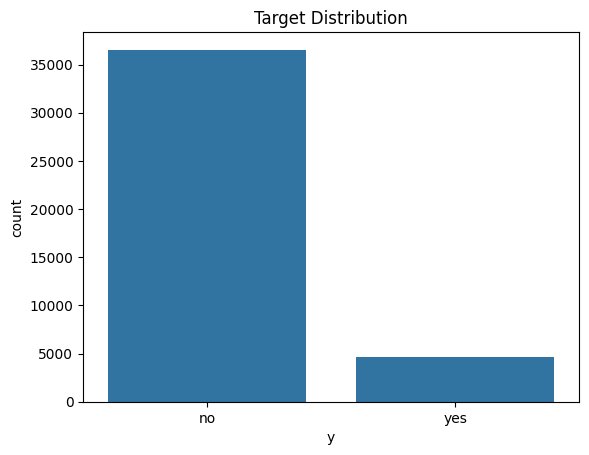

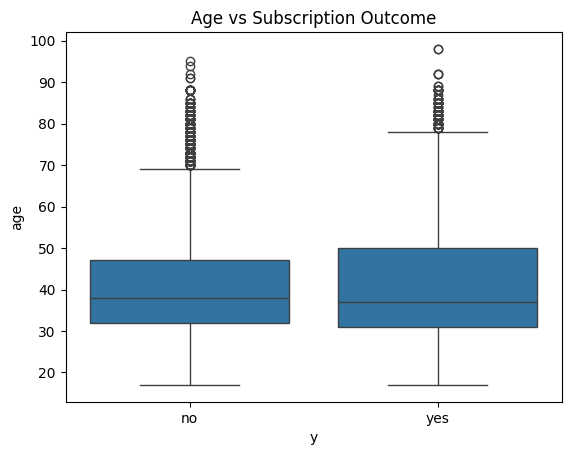

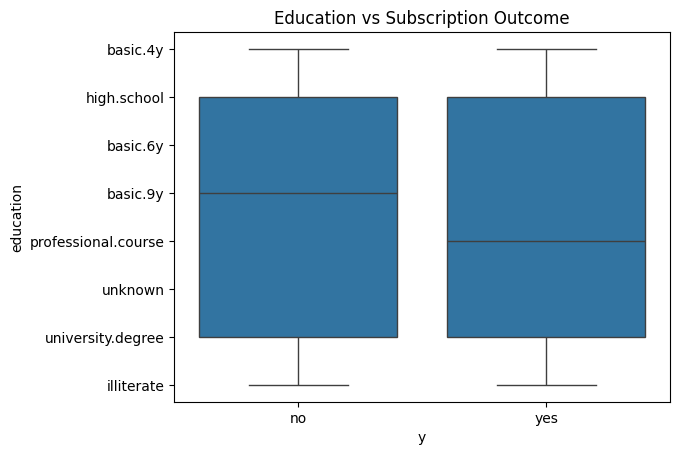

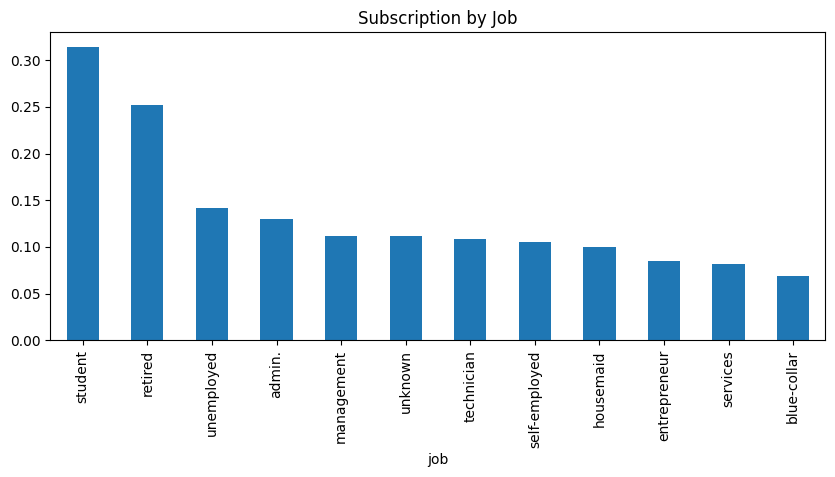

In [54]:
# Target Class Balance
sns.countplot(x='y', data=df)
plt.title("Target Distribution")
plt.show()

# Age vs subscription
sns.boxplot(x='y', y='age', data=df)
plt.title("Age vs Subscription Outcome")
plt.show()

# Education vs subscription
sns.boxplot(x='y', y='education', data=df)
plt.title("Education vs Subscription Outcome")
plt.show()

# Job vs subscription rate
job_rate = df.groupby('job')['y'].apply(lambda x: (x == 'yes').mean()).sort_values(ascending=False)
job_rate.plot(kind='bar', figsize=(10,4), title="Subscription by Job")
plt.show()

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [20]:
#Convert target variable to binary
y = (df['y'] == 'yes').astype(int)

#create bank_features with client info
bank_features = [
    'age',
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan'
]

X = df[bank_features].copy()

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41188 non-null  int64 
 1   job        41188 non-null  object
 2   marital    41188 non-null  object
 3   education  41188 non-null  object
 4   default    41188 non-null  object
 5   housing    41188 non-null  object
 6   loan       41188 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.2+ MB


In [ ]:
#create cat_features and numeric_features
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan']
numeric_features = ['age']

#create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ],
    remainder='drop'
)

#create pipeline
log_reg_pipe = Pipeline(steps=[
    ('prep', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [29]:
#Baseline or starting place is always predict the most frequent class
baseline = DummyClassifier(strategy='most_frequent', random_state=42)
baseline.fit(X_train, y_train)

baseline_train_acc = baseline.score(X_train, y_train)
baseline_test_acc = baseline.score(X_test, y_test)

baseline_train_acc, baseline_test_acc

(0.887556904400607, 0.8865015780529255)

In [ ]:
#Baseline accuracy is 0.885 meaning 88.5% of the time the model will predict the most frequent class which is no, the client doesn't subscribe to a term deposit.  This is the minimum accuracy we need to beat, otherwise the model has no real value.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [30]:
log_reg_pipe.fit(X_train, y_train)

,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Problem 9: Score the Model

What is the accuracy of your model?

In [ ]:
# Generate predictions
y_pred_lr = log_reg_pipe.predict(X_test)
lr_test_acc = accuracy_score(y_test, y_pred_lr)
lr_test_acc
#Logistic Regression accuracy is no better than the baseline, meaning logistic regression is not improving the accuracy of the model.


0.8865015780529255

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [ ]:
#create models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC()
}

In [45]:
#create results list
results = []

for name, model in models.items():
    pipe = Pipeline([
        ('prep', preprocessor),
        ('model', model)
    ])
    
    start = time.perf_counter()
    pipe.fit(X_train, y_train)
    train_time = time.perf_counter() - start
    
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)
    
    results.append({
        "Model": name,
        "Train Time (s)": train_time,
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Train F1": f1_score(y_train, y_train_pred),
        "Test F1": f1_score(y_test, y_test_pred)
    })

results_df = pd.DataFrame(results).sort_values("Test F1", ascending=False)
results_df

,Model,Train Time (s),Train Accuracy,Test Accuracy,Train F1,Test F1
2,Decision Tree,0.174490,0.916601,0.862467,0.431997,0.125097
1,KNN,0.018950,0.891138,0.876062,0.216299,0.103600
3,SVM,29.814182,0.888225,0.886744,0.021260,0.008502
0,Logistic Regression,0.040043,0.887557,0.886502,0.000000,0.000000


In [ ]:
#Overall, model complexity does not meaningfully improve predictive performance when only bank client attributes are used, this mean to improve performance, we will need richer features, alternative evaluation metrics, and likely some model tuning.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [ ]:
#Given the base-case results, we focus model improvement efforts on Logistic Regression and Decision Trees. Logistic Regression serves as a strong, interpretable baseline that can benefit from imbalance-aware tuning, while Decision Trees already capture minority-class signal but require regularization to reduce overfitting.

In [ ]:
#Logistic Regression
lr_param_grid = {
    "model__C": [0.01, 0.1, 1, 10],
    "model__penalty": ["l1", "l2"],
    "model__solver": ["liblinear"],
    "model__class_weight": [None, "balanced"]
}

lr_grid = GridSearchCV(
    Pipeline([
        ("prep", preprocessor),
        ("model", LogisticRegression(max_iter=2000))
    ]),
    lr_param_grid,
    scoring="f1",   # or "recall" depending on business framing
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1
)

lr_grid.fit(X_train, y_train)
lr_grid.best_score_, lr_grid.best_params_

(np.float64(0.25624095525237794),
 {'model__C': 1,
  'model__class_weight': 'balanced',
  'model__penalty': 'l1',
  'model__solver': 'liblinear'})

In [ ]:
#Now that we have tuned the hyperparameters, we can use this to re-train the model and see if it improves the classification performance.
best_lr = lr_grid.best_estimator_

y_train_pred = best_lr.predict(X_train)
y_test_pred = best_lr.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_acc, test_acc, train_f1, test_f1

(0.5924734446130501,
 0.5962612284535082,
 0.2576293675364883,
 0.2585822559072671)

In [ ]:
#this result is better than baseline at identifying clients who will subscribe to a term deposit.  The prior F1 for logistic regression was 0 and now we are at 0.26.


In [50]:
#Decision Trees
dt_param_grid = {
    "model__max_depth": [2, 3, 5, 8, 12, None],
    "model__min_samples_split": [2, 10, 25, 50],
    "model__min_samples_leaf": [1, 5, 10, 20],
    "model__criterion": ["gini", "entropy"]
}

dt_grid = GridSearchCV(
    Pipeline([
        ("prep", preprocessor),
        ("model", DecisionTreeClassifier(random_state=42))
    ]),
    param_grid=dt_param_grid,
    scoring="f1",
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    return_train_score=True
)

dt_grid.fit(X_train, y_train)

dt_grid.best_score_, dt_grid.best_params_

(np.float64(0.1462239905750444),
 {'model__criterion': 'entropy',
  'model__max_depth': None,
  'model__min_samples_leaf': 1,
  'model__min_samples_split': 2})

In [51]:
#Now that we have tuned the hyperparameters, we can use this to re-train the model and see if it improves the classification performance.
best_dt = dt_grid.best_estimator_

y_train_pred_dt = best_dt.predict(X_train)
y_test_pred_dt = best_dt.predict(X_test)

dt_train_acc = accuracy_score(y_train, y_train_pred_dt)
dt_test_acc = accuracy_score(y_test, y_test_pred_dt)

dt_train_f1 = f1_score(y_train, y_train_pred_dt)
dt_test_f1 = f1_score(y_test, y_test_pred_dt)

dt_train_acc, dt_test_acc, dt_train_f1, dt_test_f1

(0.9166009104704097,
 0.8648943918426802,
 0.4319966928482844,
 0.12154696132596685)

In [ ]:
#Unfortunately, this result is not better than baseline at identifying clients who will subscribe to a term deposit.  The prior F1 for Decision Tree was 0.12, now we are at 0.12


##### Questions